In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings
from termcolor import colored

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import joblib

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

C:\Users\HP\AppData\Local\Temp\ipykernel_6216\2166517657.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv('Cardiovascular_Disease_Dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,53,1,2,171,0,0,1,147,0,5.3,1
1,40,1,0,94,229,0,1,115,0,3.7,0
2,49,1,2,133,142,0,0,202,1,5.0,0
3,43,1,0,138,295,1,1,153,0,3.2,1
4,31,1,1,199,0,0,2,136,0,5.3,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1000 non-null   int64  
 1   sex       1000 non-null   int64  
 2   cp        1000 non-null   int64  
 3   trestbps  1000 non-null   int64  
 4   chol      1000 non-null   int64  
 5   fbs       1000 non-null   int64  
 6   restecg   1000 non-null   int64  
 7   thalach   1000 non-null   int64  
 8   exang     1000 non-null   int64  
 9   oldpeak   1000 non-null   float64
 10  target    1000 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 86.1 KB


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,0.580000
std,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,0.493805
min,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000
25%,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,0.000000
50%,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,1.000000
75%,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,1.000000
max,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,1.000000


In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'target'],
      dtype='object')

In [7]:
age_range = f"Age Range: {df['age'].min()} - {df['age'].max()}"
print(age_range)

Age Range: 20 - 80


In [8]:
gender_count = df['sex'].value_counts()
print(gender_count)

sex
1    765
0    235
Name: count, dtype: int64


In [9]:
average_max_heart_rate = df['thalach'].mean()
print(f"Average Maximum Heart Rate: {average_max_heart_rate:.2f}")

Average Maximum Heart Rate: 145.48


In [10]:
average_resting_bp = df['trestbps'].mean()
print(f"Average Resting Blood Pressure: {average_resting_bp:.2f} mm Hg")

Average Resting Blood Pressure: 151.75 mm Hg


In [11]:
percentage_heart_disease = (df['target'].sum() / len(df)) * 100
print(f"Percentage of Patients with Heart Disease: {percentage_heart_disease:.2f}%")

Percentage of Patients with Heart Disease: 58.00%


C:\Users\HP\AppData\Local\Temp\ipykernel_6216\2548366346.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cp', y='thalach', data=df, palette='bright')


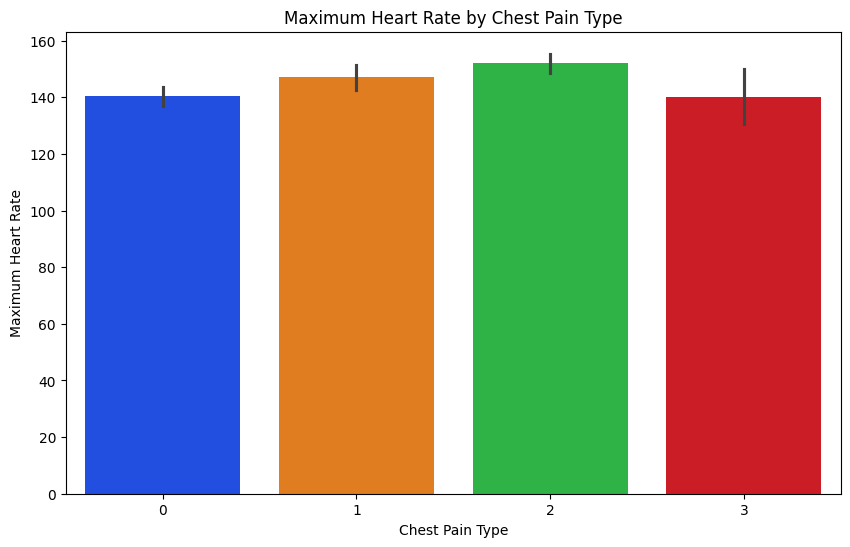

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='cp', y='thalach', data=df, palette='bright')
plt.title('Maximum Heart Rate by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Maximum Heart Rate')
plt.show()

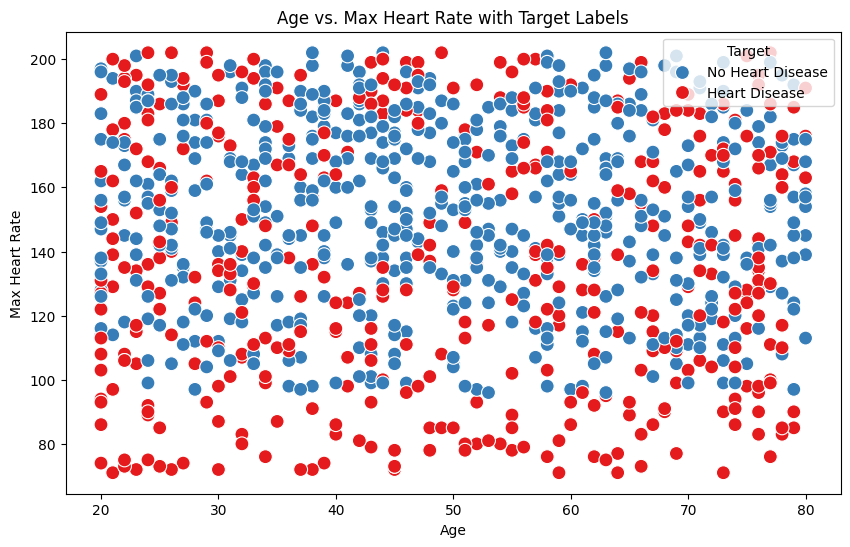

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='thalach', hue='target', data=df, palette='Set1', s=100)
plt.title('Age vs. Max Heart Rate with Target Labels')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(title='Target', loc='upper right', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

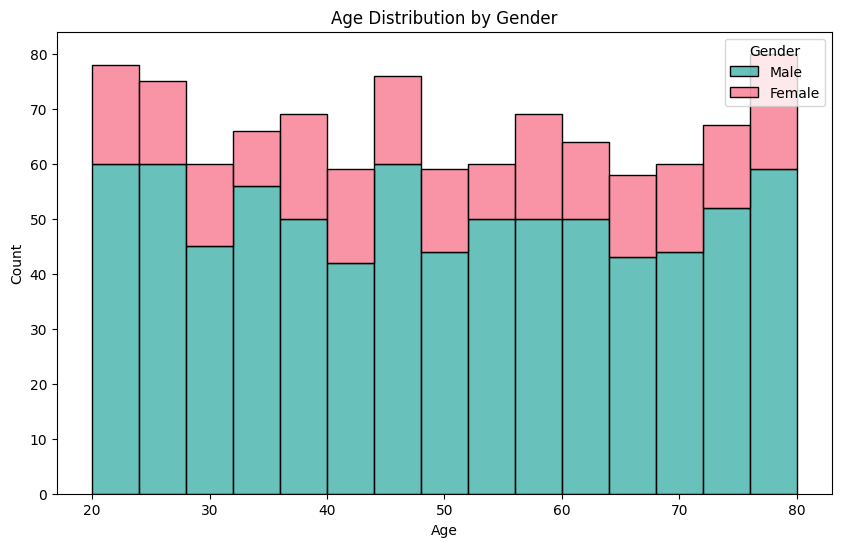

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(x='age', hue='sex', data=df, palette='husl', multiple='stack', bins=15)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

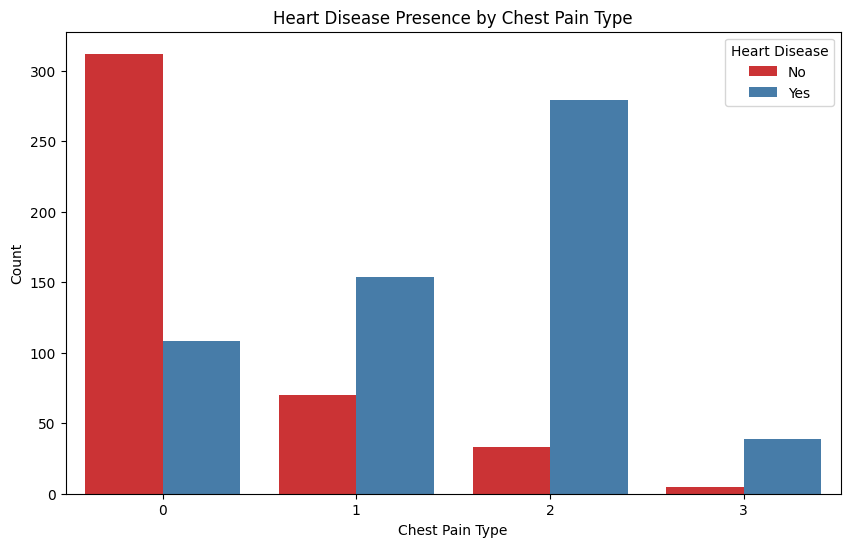

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cp', hue='target', data=df, palette='Set1')
plt.title('Heart Disease Presence by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

In [16]:
X = df.drop(['target'],axis=1)
y = df['target']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
scaler = StandardScaler(copy=True)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
#function to plot Confusion matrix
def plot_confusion_matrix(y_test, y_prediction):
    '''Plotting Confusion Matrix'''
    cm = metrics.confusion_matrix(y_test, y_prediction)
    ax = plt.subplot()
    ax = sns.heatmap(cm, annot=True, fmt='', cmap="plasma")
    ax.set_xlabel('Predicted labels', fontsize=18)
    ax.set_ylabel('True labels', fontsize=18)
    ax.set_title('Confusion Matrix', fontsize=25)
    ax.xaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])
    ax.yaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])
    plt.show()

In [19]:
#function to plot Classification report
def clfr_plot(y_test, y_pred) :
    ''' Plotting Classification report'''
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred, digits=3,
                                            output_dict=True)).T
    cr.drop(columns='support', inplace=True)
    sns.heatmap(cr, cmap='plasma', annot=True, linecolor='white', linewidths=0.5).xaxis.tick_top()

In [20]:
def clf_plot(y_pred) :
    '''
    1) Ploting Confusion Matrix
    2) Plotting Classification Report'''
    cm = metrics.confusion_matrix(y_test, y_pred)
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred, digits=3, output_dict=True)).T
    cr.drop(columns='support', inplace=True)

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    # Left: Confusion Matrix
    ax[0] = sns.heatmap(cm, annot=True, fmt='', cmap="Blues", ax=ax[0])
    ax[0].set_xlabel('Predicted labels', fontsize=18)
    ax[0].set_ylabel('True labels', fontsize=18)
    ax[0].set_title('Confusion Matrix', fontsize=25)
    ax[0].xaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])
    ax[0].yaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])

    # Right: Classification Report
    ax[1] = sns.heatmap(cr, cmap='plasma', annot=True, linecolor='white', linewidths=1, ax=ax[1])
    ax[1].xaxis.tick_top()
    ax[1].set_title('Classification Report', fontsize=25)
    plt.show()

In [21]:
#comparing the shape of different testing and training sets
print("shape of original dataset :", df.shape)
print("shape of input - training set", X_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", X_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset : (1000, 11)
shape of input - training set (800, 10)
shape of output - training set (800,)
shape of input - testing set (200, 10)
shape of output - testing set (200,)


confusion matrix
[[79 16]
 [ 9 96]]


Accuracy of Logistic Regression: 87.5 

              precision    recall  f1-score   support

           0       0.90      0.83      0.86        95
           1       0.86      0.91      0.88       105

    accuracy                           0.88       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.88      0.87       200



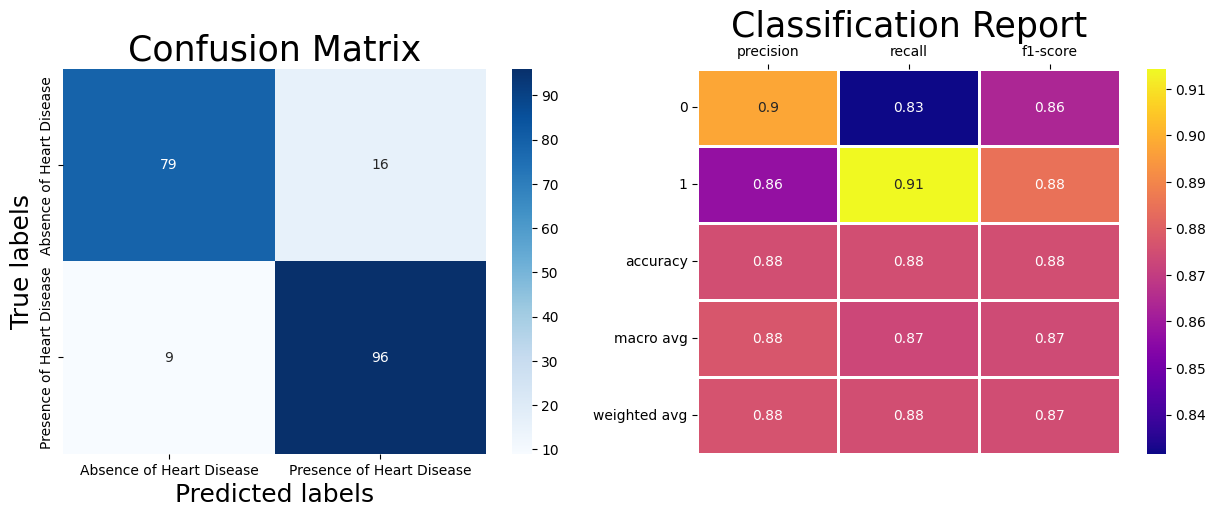

In [22]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confusion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))
clf_plot(lr_predict)

In [23]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and print the mean and standard deviation of the scores
cross_val_scores = cross_val_score(lr, X_train, y_train, cv=cv, scoring='accuracy')
print("Cross Validation Scores:", cross_val_scores)
print(f"Mean Cross Validation Score: {cross_val_scores.mean():.4f}")
print(f"Standard Deviation of Cross Validation Score: {cross_val_scores.std():.4f}")

Cross Validation Scores: [0.8625  0.80625 0.86875 0.85625 0.85625]
Mean Cross Validation Score: 0.8500
Standard Deviation of Cross Validation Score: 0.0224


In [24]:
# Predict probabilities on the test set
y_probabilities = lr.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC score
roc_auc = roc_auc_score(y_test, y_probabilities)
print(f"AUC-ROC Score: {roc_auc:.4f}")

AUC-ROC Score: 0.9354


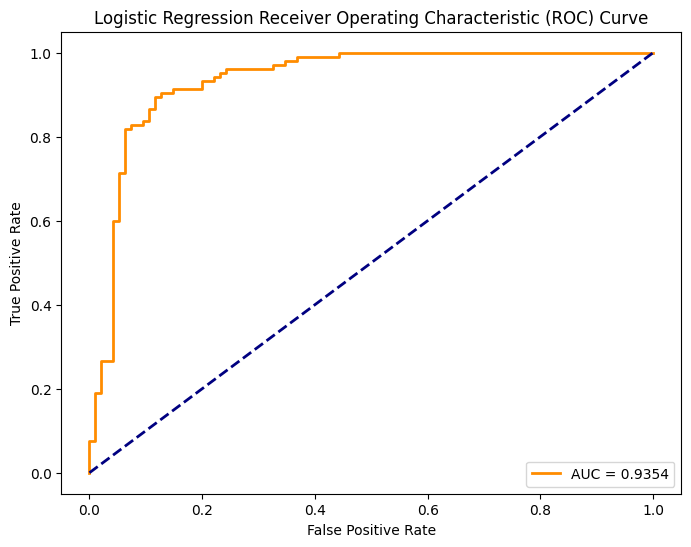

In [25]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

confussion matrix
[[85 10]
 [ 7 98]]


Accuracy of Naive Bayes model: 91.5 

              precision    recall  f1-score   support

           0       0.92      0.89      0.91        95
           1       0.91      0.93      0.92       105

    accuracy                           0.92       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.92      0.92      0.91       200



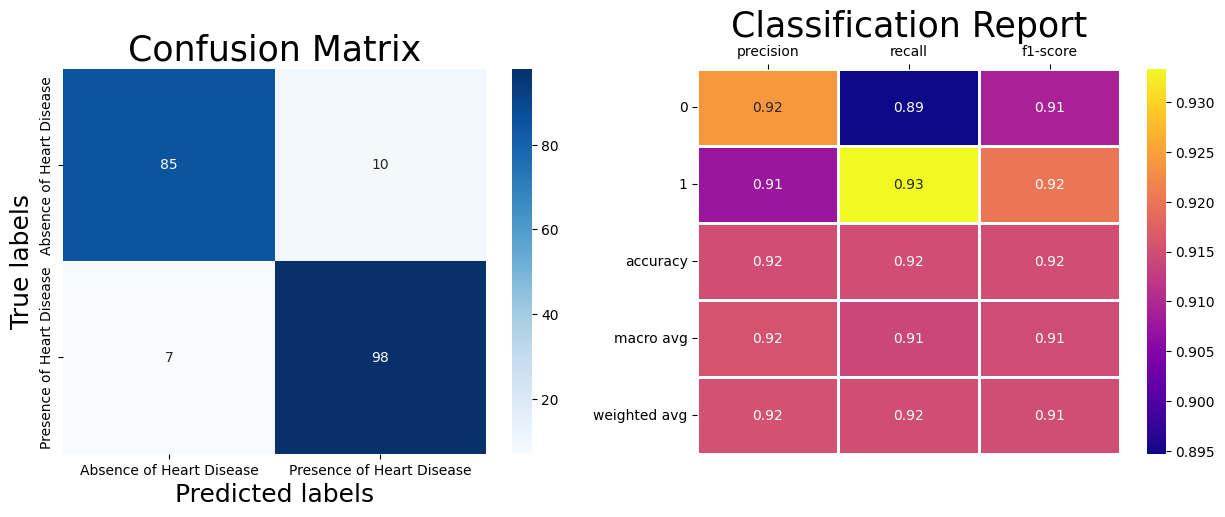

In [26]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))
clf_plot(nbpred)

In [27]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and print the mean and standard deviation of the scores
cross_val_scores = cross_val_score(nb, X_train, y_train, cv=cv, scoring='accuracy')
print("Cross Validation Scores:", cross_val_scores)
print(f"Mean Cross Validation Score: {cross_val_scores.mean():.4f}")
print(f"Standard Deviation of Cross Validation Score: {cross_val_scores.std():.4f}")

Cross Validation Scores: [0.89375 0.86875 0.89375 0.88125 0.90625]
Mean Cross Validation Score: 0.8887
Standard Deviation of Cross Validation Score: 0.0127


In [28]:
# Predict probabilities on the test set
y_probabilities = nb.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC score
roc_auc = roc_auc_score(y_test, y_probabilities)
print(f"AUC-ROC Score: {roc_auc:.4f}")

AUC-ROC Score: 0.9526


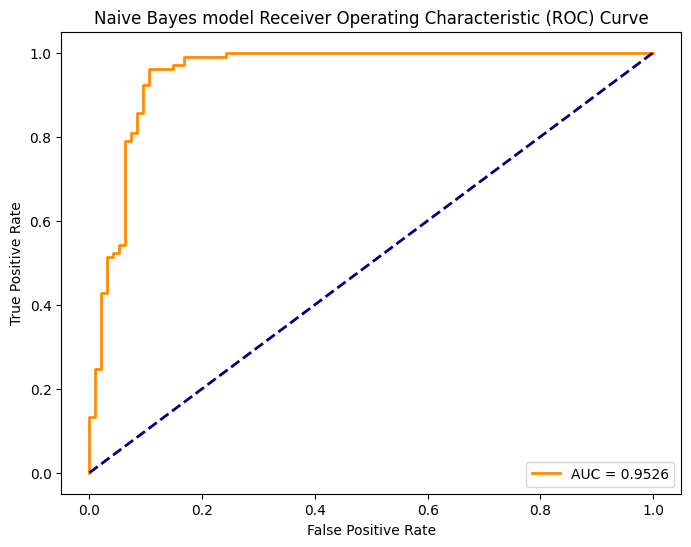

In [29]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes model Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

confussion matrix
[[ 83  12]
 [  3 102]]


Accuracy of Random Forest: 92.5 

              precision    recall  f1-score   support

           0       0.97      0.87      0.92        95
           1       0.89      0.97      0.93       105

    accuracy                           0.93       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.93      0.93      0.92       200



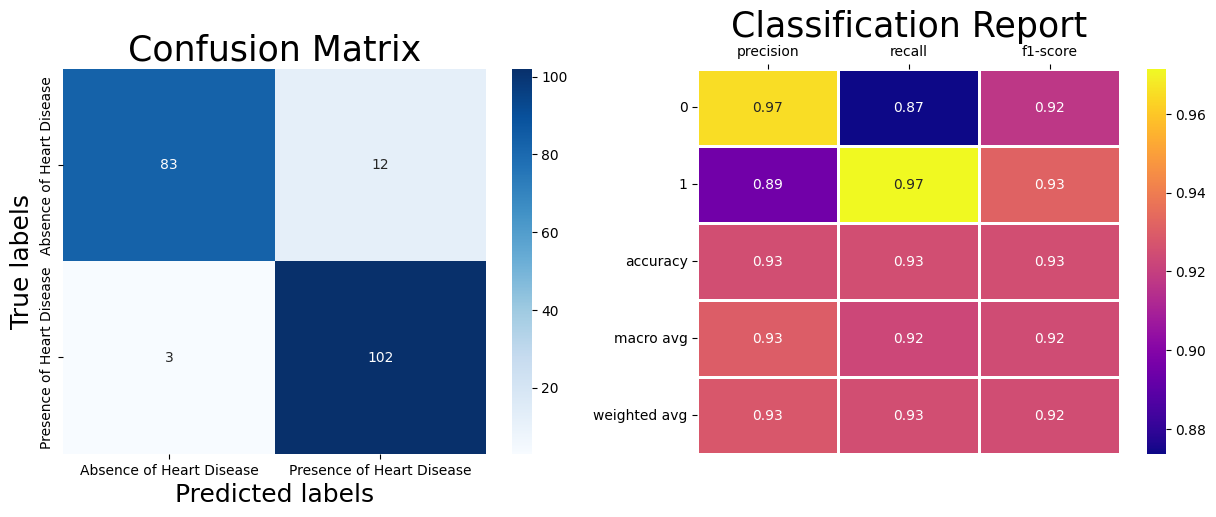

In [30]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=2,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))
clf_plot(rf_predicted)

In [31]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and print the mean and standard deviation of the scores
cross_val_scores = cross_val_score(rf, X_train, y_train, cv=cv, scoring='accuracy')
print("Cross Validation Scores:", cross_val_scores)
print(f"Mean Cross Validation Score: {cross_val_scores.mean():.4f}")
print(f"Standard Deviation of Cross Validation Score: {cross_val_scores.std():.4f}")

Cross Validation Scores: [0.925  0.925  0.95   0.9125 0.95  ]
Mean Cross Validation Score: 0.9325
Standard Deviation of Cross Validation Score: 0.0150


In [32]:
# Predict probabilities on the test set
y_probabilities = rf.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC score
roc_auc = roc_auc_score(y_test, y_probabilities)
print(f"AUC-ROC Score: {roc_auc:.4f}")

AUC-ROC Score: 0.9775


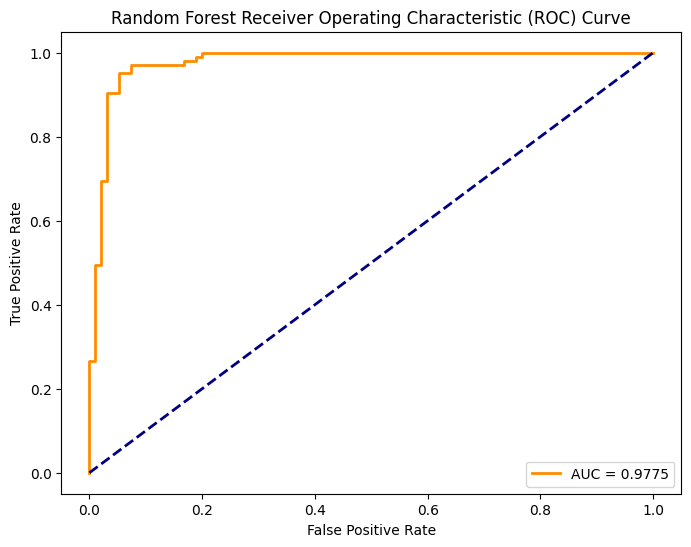

In [33]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


confussion matrix
[[84 11]
 [11 94]]


Accuracy of K-NeighborsClassifier: 89.0 

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        95
           1       0.90      0.90      0.90       105

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200



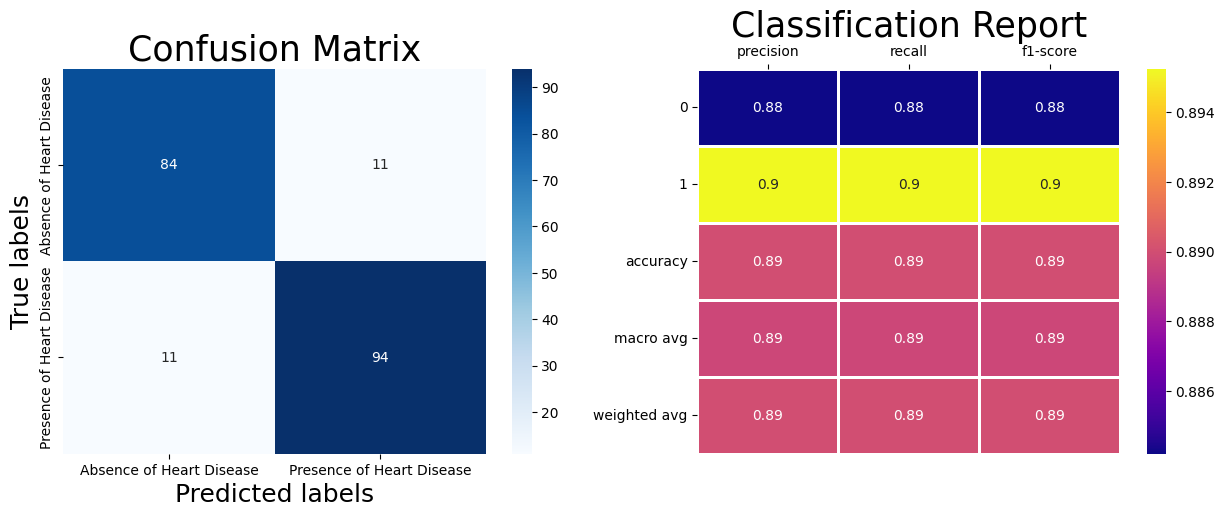

In [34]:
m4 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))
clf_plot(knn_predicted)

In [35]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and print the mean and standard deviation of the scores
cross_val_scores = cross_val_score(lr, X_train, y_train, cv=cv, scoring='accuracy')
print("Cross Validation Scores:", cross_val_scores)
print(f"Mean Cross Validation Score: {cross_val_scores.mean():.4f}")
print(f"Standard Deviation of Cross Validation Score: {cross_val_scores.std():.4f}")

Cross Validation Scores: [0.8625  0.80625 0.86875 0.85625 0.85625]
Mean Cross Validation Score: 0.8500
Standard Deviation of Cross Validation Score: 0.0224


In [36]:
# Predict probabilities on the test set
y_probabilities = knn.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC score
roc_auc = roc_auc_score(y_test, y_probabilities)
print(f"AUC-ROC Score: {roc_auc:.4f}")

AUC-ROC Score: 0.9590


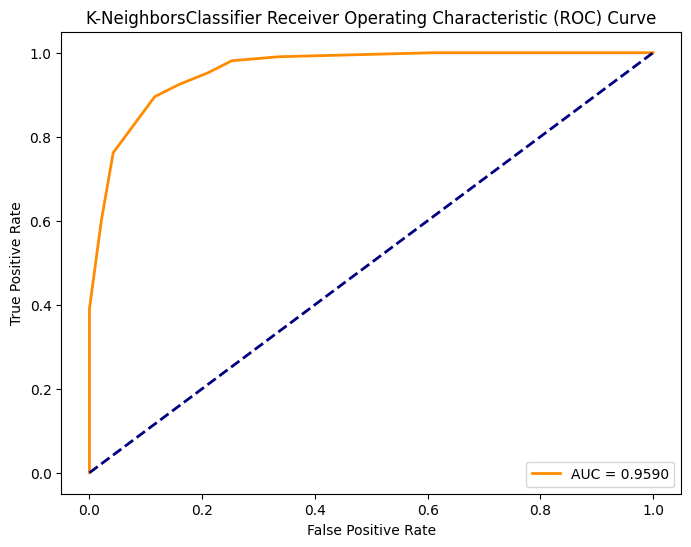

In [37]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-NeighborsClassifier Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


confussion matrix
[[86  9]
 [ 8 97]]


Accuracy of DecisionTreeClassifier: 91.5 

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        95
           1       0.92      0.92      0.92       105

    accuracy                           0.92       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.92      0.91       200



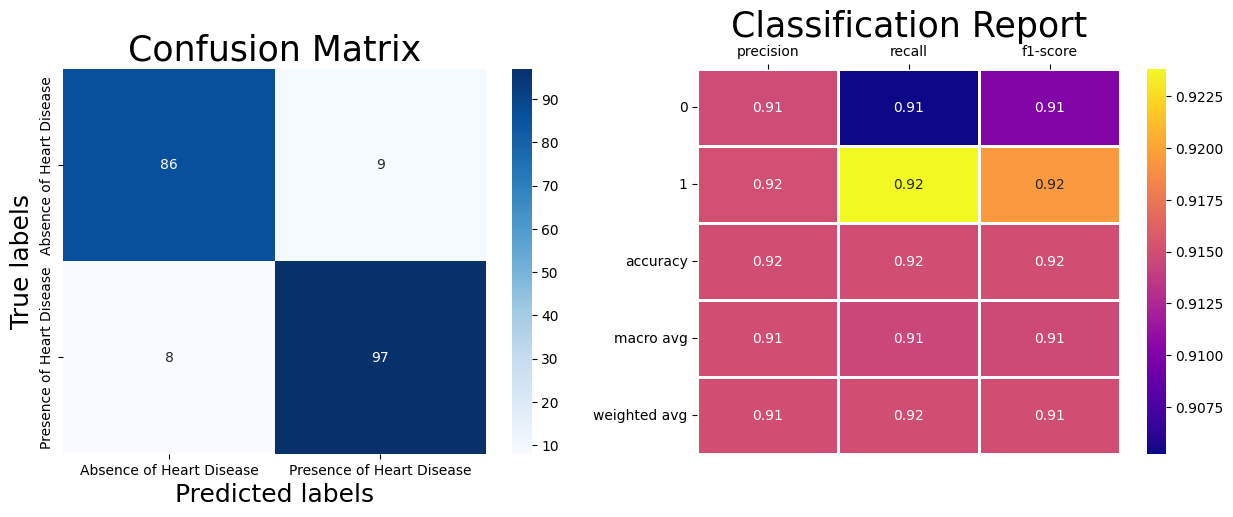

In [38]:
m5 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'gini',random_state=2,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))
clf_plot(dt_predicted)

In [39]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and print the mean and standard deviation of the scores
cross_val_scores = cross_val_score(dt, X_train, y_train, cv=cv, scoring='accuracy')
print("Cross Validation Scores:", cross_val_scores)
print(f"Mean Cross Validation Score: {cross_val_scores.mean():.4f}")
print(f"Standard Deviation of Cross Validation Score: {cross_val_scores.std():.4f}")

Cross Validation Scores: [0.89375 0.9375  0.93125 0.925   0.94375]
Mean Cross Validation Score: 0.9262
Standard Deviation of Cross Validation Score: 0.0174


In [40]:
# Predict probabilities on the test set
y_probabilities = dt.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC score
roc_auc = roc_auc_score(y_test, y_probabilities)
print(f"AUC-ROC Score: {roc_auc:.4f}")


AUC-ROC Score: 0.9548


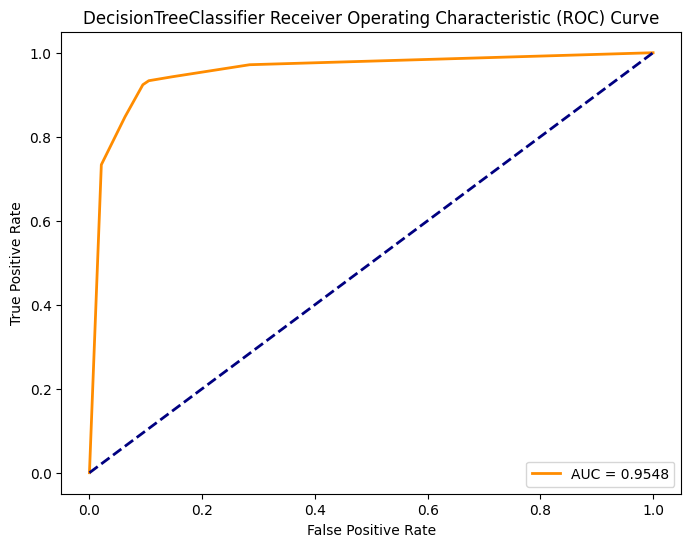

In [41]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DecisionTreeClassifier Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

confussion matrix
[[77 18]
 [ 8 97]]


Accuracy of Support Vector Classifier: 87.0 

              precision    recall  f1-score   support

           0       0.91      0.81      0.86        95
           1       0.84      0.92      0.88       105

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200



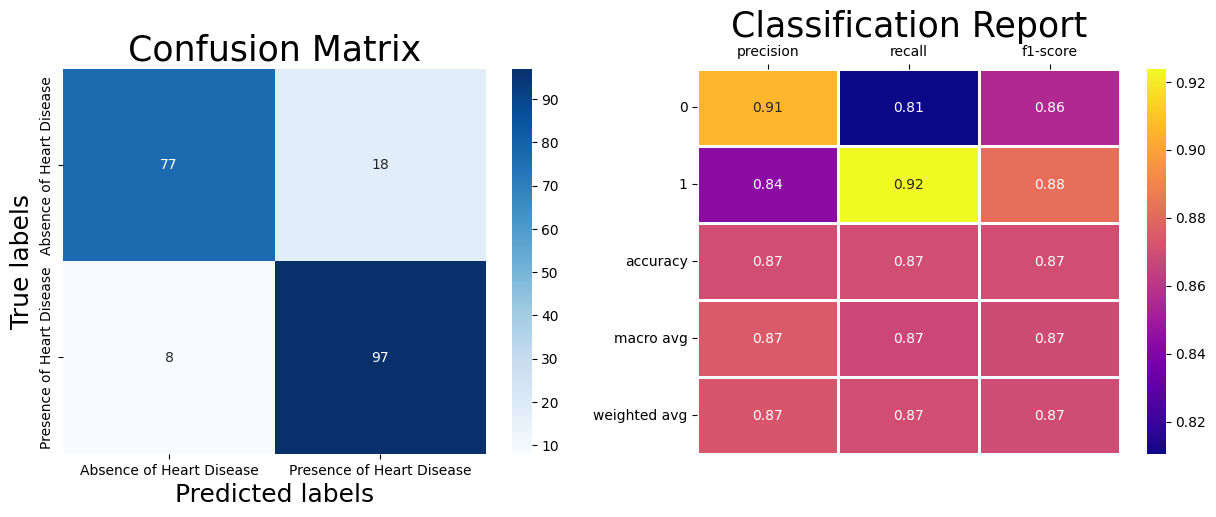

In [42]:
m6 = 'Support Vector Classifier'
svc =  SVC(kernel='linear')
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))
clf_plot(svc_predicted)

In [43]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and print the mean and standard deviation of the scores
cross_val_scores = cross_val_score(svc, X_train, y_train, cv=cv, scoring='accuracy')
print("Cross Validation Scores:", cross_val_scores)
print(f"Mean Cross Validation Score: {cross_val_scores.mean():.4f}")
print(f"Standard Deviation of Cross Validation Score: {cross_val_scores.std():.4f}")


Cross Validation Scores: [0.8625 0.825  0.85   0.8625 0.8625]
Mean Cross Validation Score: 0.8525
Standard Deviation of Cross Validation Score: 0.0146


In [44]:
# Train an SVC model
svc = OneVsRestClassifier(SVC(probability=True, kernel='linear'))
svc.fit(X_train, y_train)

# Predict decision function scores
svc_decision_scores = svc.decision_function(X_test)

# Compute overall ROC AUC score
roc_auc = roc_auc_score(y_test, svc_decision_scores, average='macro')

print(f'ROC AUC Score: {roc_auc:.4f}')

ROC AUC Score: 0.9314


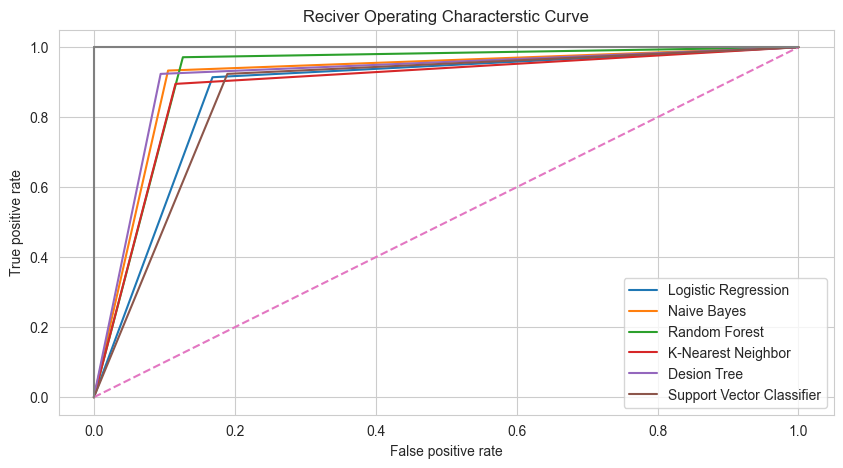

In [45]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [46]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,87.5
1,Naive Bayes,91.5
2,Random Forest,92.5
3,K-Nearest Neighbour,89.0
4,Decision Tree,91.5
5,Support Vector Machine,87.0


In [47]:
# save the model and scaler file for the trained data

# filename = 'heart_disease_model.pkl'
# pickle.dump(rf, open(filename, 'wb'))
# filename = 'heart_disease_scaler.pkl'
# pickle.dump(scaler, open(filename, 'wb'))


In [48]:

loaded_model = pickle.load(open('heart_disease_model.pkl', 'rb'))
loaded_scaler = pickle.load(open('heart_disease_scaler.pkl', 'rb'))

input_data = (52, 1, 0,	130,	320,	0,	0,	180,	1,	4.0,)


# reshape the input data as a single instance with multiple features
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# standardize the input data
standardized_data = loaded_scaler.transform(input_data_reshaped)

prediction = loaded_model.predict(standardized_data)

if (prediction[0] == 0):
  print('The person does not have a heart disease')
else:
  print('The person has heart disease')

The person does not have a heart disease


f:\Heart Disease Prediction System\version3\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
